Questão 3. Obtenha os seguintes dados no IPEADATA:
• Índice nacional de preços ao consumidor amplo (IPCA) geral: taxa de variação de 1980
a 2022.
• Meio de pagamento ampliado - M2 - fim de período - R$ (milhões).

Siga os seguintes passos:
- i. Faça um gráfico para a série de inflação para o período completo e para dois subperíodos: 1980-1994:6 e 1994:7 em diante.
- Para o primeiro subperíodo identifique os diversos planos de estabilização no período.2 A que se deve o sucesso do Plano Real em reduzir a inflação? Qual o papel da responsabilidade fiscal?

In [65]:
# Bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
ipca = pd.read_csv(r'M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 3\Base de dados\IPCA geral.csv')
m2_milhoes = pd.read_csv(r'M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 3\Base de dados\M2 - milhões.csv')

In [67]:
m2_milhoes.drop(columns=[col for col in m2_milhoes.columns if "Unnamed" in col], inplace=True, errors='ignore')
ipca.drop(columns=[col for col in ipca.columns if "Unnamed" in col], inplace=True, errors='ignore')

m2_milhoes.columns = ['Data', 'M2']
ipca.columns = ['Data', 'IPCA (% a.m.)']

In [68]:
m2_milhoes.head(10)

,Data,M2
0,1988.07,0.005210
1,1988.08,0.006339
2,1988.09,0.007874
3,1988.10,0.009995
4,1988.11,0.012592
5,1988.12,0.016871
6,1989.01,0.019582
7,1989.02,0.021968
8,1989.03,0.025624
9,1989.04,0.030326


In [69]:
def converter_data(value):
    try:
        value_str = str(value).strip()
        if '.' in value_str:
            ano, mes = value_str.split('.')
            ano = int(ano)
            mes = int(float(f"0.{mes}") * 12 + 1)
            return pd.Timestamp(year=ano, month=mes, day=1)
        else:
            return pd.NaT
    except ValueError:
        return pd.NaT 

ipca['Data'] = ipca['Data'].apply(converter_data)
m2_milhoes['Data'] = m2_milhoes['Data'].apply(converter_data)

ipca_1980_1994 = ipca[(ipca['Data'] >= '1980-01-01') & (ipca['Data'] <= '1994-06-01')]
ipca_1994_em_diante = ipca[ipca['Data'] >= '1994-07-01']

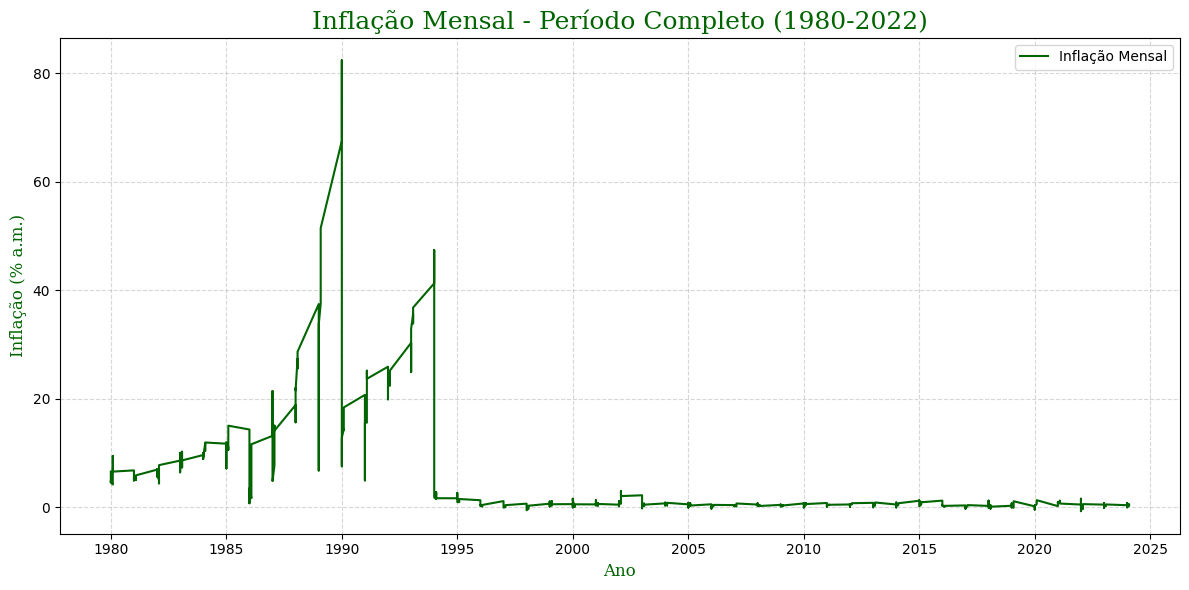

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(ipca['Data'], ipca['IPCA (% a.m.)'], label='Inflação Mensal', color='darkgreen')
plt.title('Inflação Mensal - Período Completo (1980-2022)',  fontdict={'family':'serif','color':'darkgreen','size':18})
plt.xlabel('Ano', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.ylabel('Inflação (% a.m.)', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


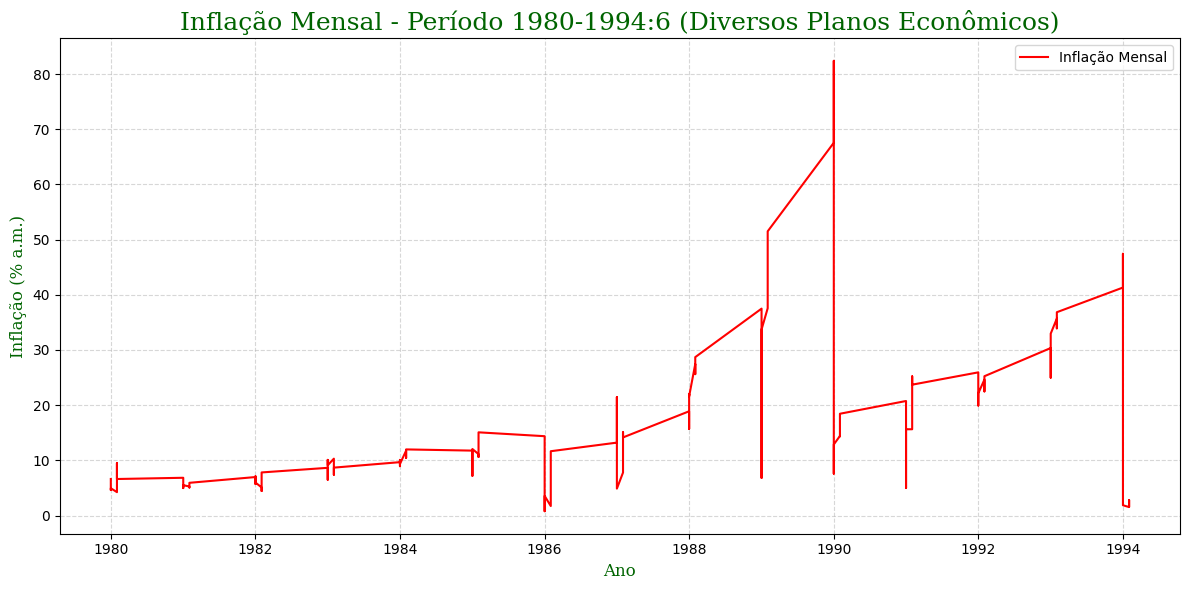

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(ipca_1980_1994['Data'], ipca_1980_1994['IPCA (% a.m.)'], label='Inflação Mensal', color='red')
plt.title('Inflação Mensal - Período 1980-1994:6 (Diversos Planos Econômicos)', fontdict={'family':'serif','color':'darkgreen','size':18})
plt.xlabel('Ano', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.ylabel('Inflação (% a.m.)', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

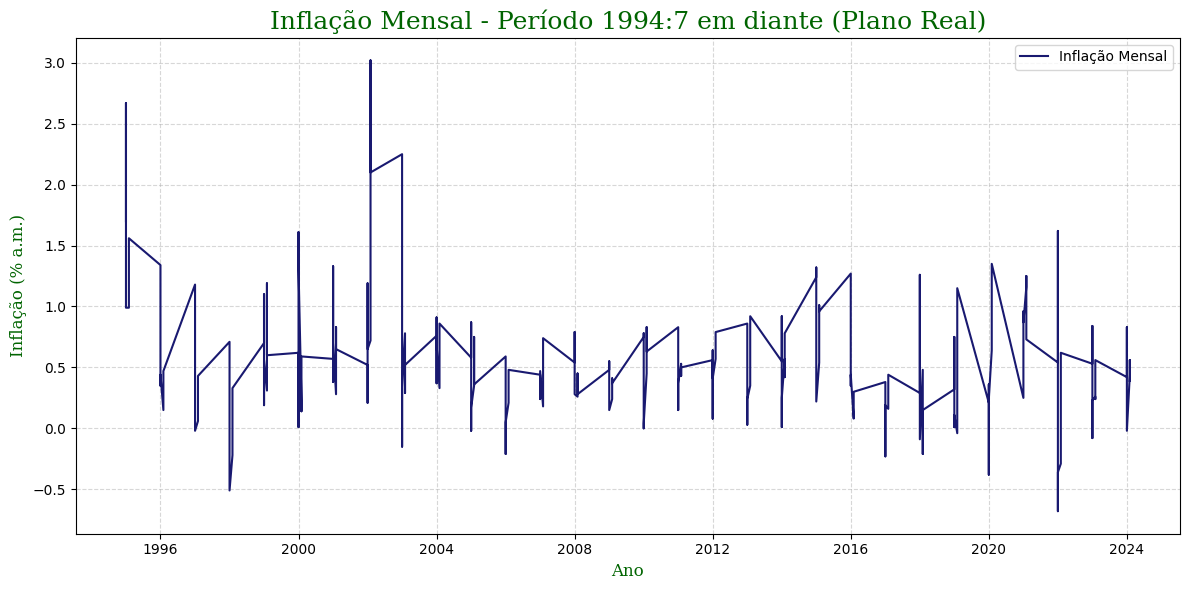

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(ipca_1994_em_diante['Data'], ipca_1994_em_diante['IPCA (% a.m.)'], label='Inflação Mensal', color='midnightblue')
plt.title('Inflação Mensal - Período 1994:7 em diante (Plano Real)', fontdict={'family':'serif','color':'darkgreen','size':18})
plt.xlabel('Ano', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.ylabel('Inflação (% a.m.)', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


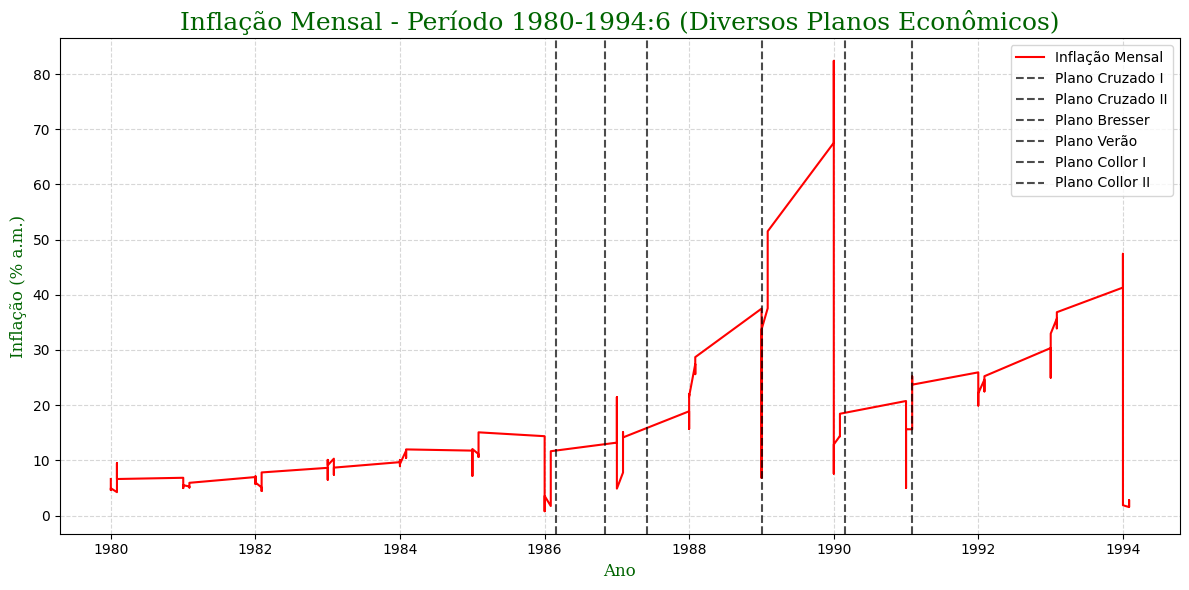

In [78]:
# Datas dos principais planos econômicos
planos = {
    "Plano Cruzado I": "1986-03-01",
    "Plano Cruzado II": "1986-11-01",
    "Plano Bresser": "1987-06-01",
    "Plano Verão": "1989-01-01",
    "Plano Collor I": "1990-03-01",
    "Plano Collor II": "1991-02-01"
}

plt.figure(figsize=(12, 6))
plt.plot(ipca_1980_1994['Data'], ipca_1980_1994['IPCA (% a.m.)'], label='Inflação Mensal', color='red')

for plano, data in planos.items():
    plt.axvline(pd.Timestamp(data), color='black', linestyle='--', alpha=0.7, label=plano)

plt.title('Inflação Mensal - Período 1980-1994:6 (Diversos Planos Econômicos)', fontdict={'family':'serif','color':'darkgreen','size':18})
plt.xlabel('Ano', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.ylabel('Inflação (% a.m.)', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### Planos de Estabilização
No subperíodo de 1980-1994, o Brasil passou por vários planos econômicos, como:

Plano Cruzado (1986);
Plano Bresser (1987);
Plano Verão (1989);
Plano Collor I e II (1990-1991).
Esses planos falharam principalmente por falta de sustentação fiscal e pela tentativa de controlar a inflação de forma abrupta, como congelamento de preços, sem atacar as causas estruturais.

### O Plano Real (1994) foi bem-sucedido devido a:

Âncora Cambial: O real foi atrelado ao dólar, criando confiança na moeda.
Responsabilidade Fiscal: Medidas como a Lei de Responsabilidade Fiscal (2000) consolidaram o equilíbrio das contas públicas.
Controle Monetário: Foi implementado um regime de metas de inflação, conferindo credibilidade ao Banco Central.
Reformas Estruturais: Medidas para reduzir gastos públicos e melhorar a eficiência econômica.
Papel da responsabilidade fiscal:
A responsabilidade fiscal foi essencial para evitar a emissão de moeda para cobrir déficits, o que era uma das principais causas da hiperinflação. Ao controlar os gastos e implementar políticas fiscais responsáveis, o governo reforçou a estabilidade macroeconômica.

Sucesso do Plano Real: A redução da inflação foi possível devido à introdução da URV (Unidade Real de Valor), que ajudou a estabilizar preços e promover confiança.
Responsabilidade Fiscal: A criação da Lei de Responsabilidade Fiscal (2000) garantiu disciplina nos gastos públicos, promovendo estabilidade macroeconômica no longo prazo.

### ii. Agora calcule a taxa de variação da série de M2 para todo o período disponível. Feito isto, faça um gráfico colocando a taxa de variação (em %) de M2 junto com a taxa de inflação para o período 1988:8-1994:6.